In [31]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay, r2_score, mean_squared_error, f1_score
from plotnine import *
import matplotlib.pyplot as plt

In [32]:
cb0 = pd.read_csv("/Users/andriy/Desktop/GSB544_ML/Week_9/Lab_8/cannabis_full.csv").dropna()

In [33]:
cb0.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
(cb0['Type']=='hybrid').sum()

np.int64(1123)

In [35]:
(cb0['Type']=='sativa').sum()

np.int64(409)

In [36]:
(cb0['Type']=='indica').sum()

np.int64(659)

## Part One: Binary Classification

Data

In [37]:
cb0['Type'].unique()

array(['hybrid', 'sativa', 'indica'], dtype=object)

In [38]:
cb1 = cb0.drop(cb0[cb0['Type']=='hybrid'].index)
cb1

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,Zeta-Sage,sativa,4.5,"Happy,Relaxed,Uplifted,Euphoric,Focused","Diesel,Pungent,Sage",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
cb1['Type'].unique()

array(['sativa', 'indica'], dtype=object)

In [40]:
len(cb1['Strain'].unique())
# strain name is unique for every entry, hence it makes sense to remove this from the X feature set in the models - to avoid fitting issues and errors.

1068

In [41]:
len(cb1)

1068

In [42]:
cb1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, 2 to 2350
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Strain        1068 non-null   object 
 1   Type          1068 non-null   object 
 2   Rating        1068 non-null   float64
 3   Effects       1068 non-null   object 
 4   Flavor        1068 non-null   object 
 5   Creative      1068 non-null   float64
 6   Energetic     1068 non-null   float64
 7   Tingly        1068 non-null   float64
 8   Euphoric      1068 non-null   float64
 9   Relaxed       1068 non-null   float64
 10  Aroused       1068 non-null   float64
 11  Happy         1068 non-null   float64
 12  Uplifted      1068 non-null   float64
 13  Hungry        1068 non-null   float64
 14  Talkative     1068 non-null   float64
 15  Giggly        1068 non-null   float64
 16  Focused       1068 non-null   float64
 17  Sleepy        1068 non-null   float64
 18  Dry           1068 non-null   flo

In [43]:
X = cb1.drop(columns=['Strain','Type','Effects','Flavor']) # exclude redundant columns
y = cb1['Type']

In [44]:
X.head()

,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4.4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Models

## Q1: LDA

In [45]:
# LDA pipe

ct = ColumnTransformer(
  [
#    ("dummify",
#    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
#    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

lda_pipe = Pipeline([
    ('preprocessing', ct), # note: the dataset is already dummified
    ('lda', LinearDiscriminantAnalysis())
]).set_output(transform="pandas")

In [46]:
# tunning LDA model with multiple parameters # note: assisted by ChatGPT

param_grid = [
    {'lda__solver': ['svd']}, 
    {'lda__solver': ['lsqr', 'eigen'], 'lda__shrinkage': ['auto', 0.1, 0.5, 1.0]}
] # note: consider using 'n_components' parameter ranges(1, min(n_classes -1, n_features) with multiclass classification

gsvc = GridSearchCV(lda_pipe, param_grid, cv=5, scoring='f1_macro')
gsvc.fit(X, y)
# as the distribution of differnet 'strain types' is not even, using a 'harmonized' metric 'f1' to optimize the model.

print("Best parameters: ", gsvc.best_params_)
print("Best cross-validation score (F1): ", gsvc.best_score_)

Best parameters:  {'lda__shrinkage': 0.5, 'lda__solver': 'lsqr'}
Best cross-validation score (F1):  0.8576853104343731
Best parameters:  {'lda__shrinkage': 0.5, 'lda__solver': 'lsqr'}
Best cross-validation score (F1):  0.8576853104343731


Best LDA model parameters are:
'lda__shrinkage': 0.5, 'lda__solver': 'lsqr'

Best cross-validation score (F1):  0.8576853104343731

In [47]:
# y_pred with best parameters and cross_val_predict
best_lda = gsvc.best_estimator_
y_pred = cross_val_predict(best_lda, X, y, cv=5)

# scores
print("F1 score (macro): ", f1_score(y, y_pred, average='macro'))
print("Accuracy score: ", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

F1 score (macro):  0.8576732348050018
Accuracy score:  0.8670411985018727
Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.91      0.89       659
      sativa       0.85      0.80      0.82       409

    accuracy                           0.87      1068
   macro avg       0.86      0.85      0.86      1068
weighted avg       0.87      0.87      0.87      1068

F1 score (macro):  0.8576732348050018
Accuracy score:  0.8670411985018727
Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.91      0.89       659
      sativa       0.85      0.80      0.82       409

    accuracy                           0.87      1068
   macro avg       0.86      0.85      0.86      1068
weighted avg       0.87      0.87      0.87      1068



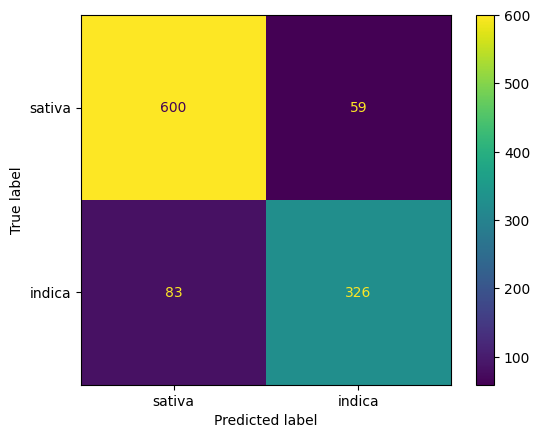

In [48]:
# confusion matrix
cm_best_lda = confusion_matrix(y, y_pred)

labels = cb1['Type'].unique()
ConfusionMatrixDisplay(cm_best_lda, display_labels = labels).plot()

## Q1: QDA

In [49]:
# QDA pipe

ct = ColumnTransformer(
  [
#    ("dummify",
#    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
#    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

qda_pipe = Pipeline([
    ('preprocessing', ct), # note: the dataset is already dummified
    ('qda', QuadraticDiscriminantAnalysis())
]).set_output(transform="pandas")

In [50]:
# tunning model with parameters # note: assisted by ChatGPT

param_grid = {
    'qda__reg_param': [0.1, 0.5, 0.7, 0.8, 1.0] # testing different regularization values
    }

gsvc = GridSearchCV(qda_pipe, param_grid, cv=5, scoring='f1_macro')
gsvc.fit(X, y)
# as the distribution of differnet 'strain types' is not even, using a 'harmonized' metric 'f1' to optimize the model.

print("Best parameters: ", gsvc.best_params_)
print("Best cross-validation score (F1): ", gsvc.best_score_)

Best parameters:  {'qda__reg_param': 1.0}
Best cross-validation score (F1):  0.8552499276658413
Best parameters:  {'qda__reg_param': 1.0}
Best cross-validation score (F1):  0.8552499276658413


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site

Best QDA model parameters:
'qda__reg_param': 1 - meaning model performs best with 'full' regularization, ignoring correlations between features (which may oversimplify the model by ignoring important relationships between features).

Best cross-validation score (F1):  0.8552499276658413

In [51]:
# y_pred with best parameters and cross_val_predict
best_qda = gsvc.best_estimator_
y_pred = cross_val_predict(best_qda, X, y, cv=5)

# scores
print("F1 score (macro): ", f1_score(y, y_pred, average='macro'))
print("Accuracy score: ", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear


F1 score (macro):  0.8553249769478484
Accuracy score:  0.8642322097378277
Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.90      0.89       659
      sativa       0.84      0.80      0.82       409

    accuracy                           0.86      1068
   macro avg       0.86      0.85      0.86      1068
weighted avg       0.86      0.86      0.86      1068

F1 score (macro):  0.8553249769478484
Accuracy score:  0.8642322097378277
Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.90      0.89       659
      sativa       0.84      0.80      0.82       409

    accuracy                           0.86      1068
   macro avg       0.86      0.85      0.86      1068
weighted avg       0.86      0.86      0.86      1068



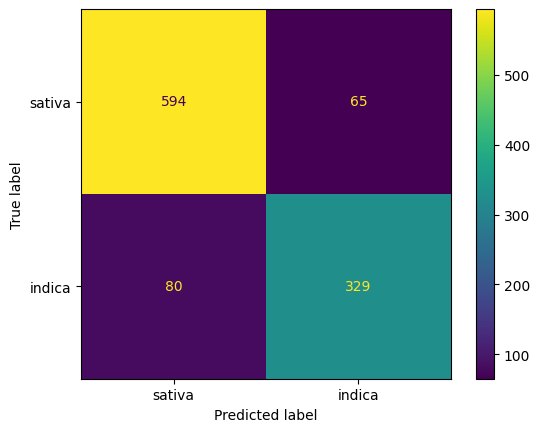

In [52]:
# confusion matrix
cm_best_qda = confusion_matrix(y, y_pred)

labels = cb1['Type'].unique()
ConfusionMatrixDisplay(cm_best_qda, display_labels = labels).plot()

## Q1: SVC

In [53]:
# SVC pipe

ct = ColumnTransformer(
  [
#    ("dummify",
#    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
#    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

svc_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', SVC(kernel='linear')) # set seed kernel to 'linear', ref: https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html
]).set_output(transform="pandas")

In [60]:
# tunning model # note: assisted by ChatGPT

param_grid={'model__C': [0.01, 0.05, 0.09, 0.1, 0.12, 0.2, 1, 2]}

gsvc = GridSearchCV(svc_pipe, param_grid, cv=5, scoring='f1_macro')
gsvc_fitted = gsvc.fit(X, y)


# as the distribution of differnet 'strain types' is not even, using a 'harmonized' metric 'f1' to optimize the model.

print("Best parameters: ", gsvc.best_params_)
print("Best cross-validation score (F1): ", gsvc.best_score_)

Best parameters:  {'model__C': 0.09}
Best cross-validation score (F1):  0.850362228342394
Best parameters:  {'model__C': 0.09}
Best cross-validation score (F1):  0.850362228342394


Best SVC model parameters:
'model__C': 0.09

Best cross-validation score (F1):  0.850362228342394

In [61]:
# y_pred with best parameters and cross_val_predict
best_svc = gsvc.best_estimator_
y_pred = cross_val_predict(best_svc, X, y, cv=5)

# scores
print("F1 score (macro): ", f1_score(y, y_pred, average='macro'))
print("Accuracy score: ", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

F1 score (macro):  0.8504101116041415
Accuracy score:  0.8595505617977528
Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.90      0.89       659
      sativa       0.83      0.80      0.81       409

    accuracy                           0.86      1068
   macro avg       0.85      0.85      0.85      1068
weighted avg       0.86      0.86      0.86      1068

F1 score (macro):  0.8504101116041415
Accuracy score:  0.8595505617977528
Classification Report:
               precision    recall  f1-score   support

      indica       0.88      0.90      0.89       659
      sativa       0.83      0.80      0.81       409

    accuracy                           0.86      1068
   macro avg       0.85      0.85      0.85      1068
weighted avg       0.86      0.86      0.86      1068



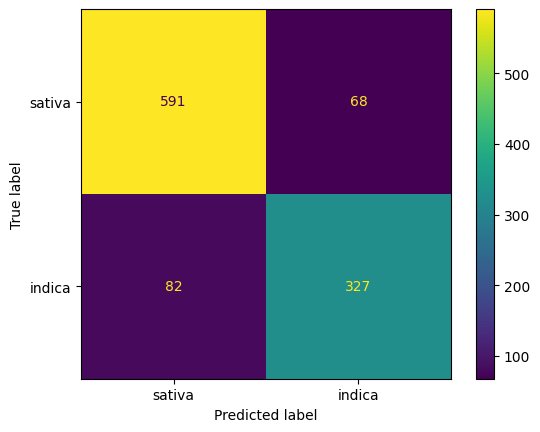

In [62]:
# confusion matrix
cm_best_svc = confusion_matrix(y, y_pred)

labels = cb1['Type'].unique()
ConfusionMatrixDisplay(cm_best_svc, display_labels = labels).plot()

## Q1: SVM

### SVM - Radial

In [69]:
# SVM pipe 1 - Radial

ct = ColumnTransformer(
  [
#    ("dummify",
#    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
#    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

svm_pipe = Pipeline([
    ('preprocessing', ct),
    ('svm', SVC(kernel='rbf'))
]).set_output(transform="pandas")

In [71]:
# tunning model # note: assisted by ChatGPT

param_grid={
    'svm__C': [0.01, 0.05, 0.09, 0.1, 0.12, 1, 10],  # Regularization coefficient
    'svm__gamma': [1, 0.1, 0.01, 0.001]  # Kernel Coefficient
    }

gsvc = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='f1_macro')
gsvc_fitted = gsvc.fit(X, y)


# as the distribution of differnet 'strain types' is not even, using a 'harmonized' metric 'f1' to optimize the model.

print("Best parameters: ", gsvc.best_params_)
print("Best cross-validation score (F1): ", gsvc.best_score_)

Best parameters:  {'svm__C': 1, 'svm__gamma': 0.01}
Best cross-validation score (F1):  0.8403027414298826
Best parameters:  {'svm__C': 1, 'svm__gamma': 0.01}
Best cross-validation score (F1):  0.8403027414298826


Best SVM model parameters:
'svm__C': 1, 'svm__gamma': 0.01

Best cross-validation score (F1):  0.8403027414298826

In [72]:
# y_pred with best parameters and cross_val_predict
best_svm = gsvc.best_estimator_
y_pred = cross_val_predict(best_svm, X, y, cv=5)

# scores
print("F1 score (macro): ", f1_score(y, y_pred, average='macro'))
print("Accuracy score: ", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

F1 score (macro):  0.8404943575245214
Accuracy score:  0.852996254681648
Classification Report:
               precision    recall  f1-score   support

      indica       0.85      0.92      0.89       659
      sativa       0.85      0.75      0.80       409

    accuracy                           0.85      1068
   macro avg       0.85      0.83      0.84      1068
weighted avg       0.85      0.85      0.85      1068

F1 score (macro):  0.8404943575245214
Accuracy score:  0.852996254681648
Classification Report:
               precision    recall  f1-score   support

      indica       0.85      0.92      0.89       659
      sativa       0.85      0.75      0.80       409

    accuracy                           0.85      1068
   macro avg       0.85      0.83      0.84      1068
weighted avg       0.85      0.85      0.85      1068



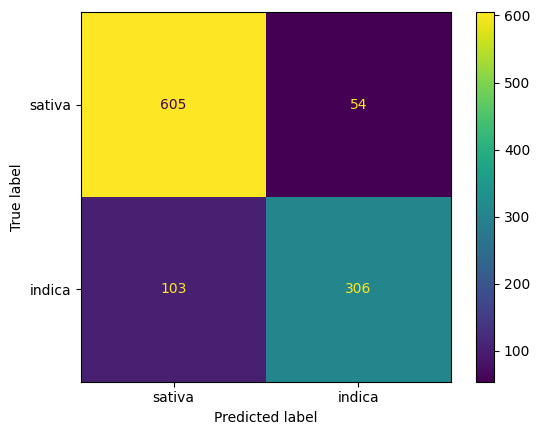

In [73]:
# confusion matrix
cm_best_svm = confusion_matrix(y, y_pred)

labels = cb1['Type'].unique()
ConfusionMatrixDisplay(cm_best_svm, display_labels = labels).plot()

### SVM - Polynomial

In [74]:
# SVM pipe 2 - Polynomial

ct = ColumnTransformer(
  [
#    ("dummify",
#    OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop="first"),
#    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
).set_output(transform="pandas")

svm_pipe = Pipeline([
    ('preprocessing', ct),
    ('svm', SVC(kernel='poly'))
]).set_output(transform="pandas")

In [77]:
# tunning model # note: assisted by ChatGPT

param_grid={
    'svm__C': [0.01, 0.05, 0.09, 0.1, 0.12, 1, 10],  # Regularization coefficient
    'svm__degree': [2, 3, 4, 5],  # Polynomial degree
    'svm__coef0': [0.0, 0.5, 1, 2, 3, 5],  # Independent term
    'svm__gamma': ['scale', 'auto']  # Kernel Coefficient
    }

gsvc = GridSearchCV(svm_pipe, param_grid, cv=5, scoring='f1_macro')
gsvc_fitted = gsvc.fit(X, y)


# as the distribution of differnet 'strain types' is not even, using a 'harmonized' metric 'f1' to optimize the model.

print("Best parameters: ", gsvc.best_params_)
print("Best cross-validation score (F1): ", gsvc.best_score_)

Best parameters:  {'svm__C': 0.09, 'svm__coef0': 2, 'svm__degree': 4, 'svm__gamma': 'scale'}
Best cross-validation score (F1):  0.8595493522516129
Best parameters:  {'svm__C': 0.09, 'svm__coef0': 2, 'svm__degree': 4, 'svm__gamma': 'scale'}
Best cross-validation score (F1):  0.8595493522516129


Best SVM model parameters:
'svm__C': 0.09, 'svm__coef0': 2, 'svm__degree': 4, 'svm__gamma': 'scale'

Best cross-validation score (F1):  0.8595493522516129

In [78]:
# y_pred with best parameters and cross_val_predict
best_svm = gsvc.best_estimator_
y_pred = cross_val_predict(best_svm, X, y, cv=5)

# scores
print("F1 score (macro): ", f1_score(y, y_pred, average='macro'))
print("Accuracy score: ", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))

F1 score (macro):  0.8595920011412556
Accuracy score:  0.8679775280898876
Classification Report:
               precision    recall  f1-score   support

      indica       0.89      0.90      0.89       659
      sativa       0.84      0.81      0.83       409

    accuracy                           0.87      1068
   macro avg       0.86      0.86      0.86      1068
weighted avg       0.87      0.87      0.87      1068

F1 score (macro):  0.8595920011412556
Accuracy score:  0.8679775280898876
Classification Report:
               precision    recall  f1-score   support

      indica       0.89      0.90      0.89       659
      sativa       0.84      0.81      0.83       409

    accuracy                           0.87      1068
   macro avg       0.86      0.86      0.86      1068
weighted avg       0.87      0.87      0.87      1068



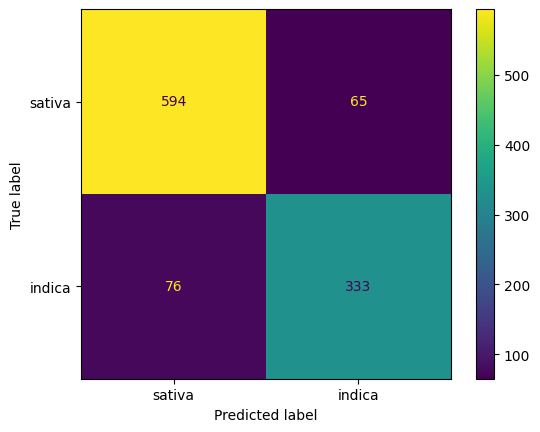

In [79]:
# confusion matrix
cm_best_svm = confusion_matrix(y, y_pred)

labels = cb1['Type'].unique()
ConfusionMatrixDisplay(cm_best_svm, display_labels = labels).plot()

SVM model choice: between the two tuned 'Radial' and 'Polynomial' SVM models tested, the 'Polynomial SVM model' scored slightly better than the 'Radial' model.